In [1]:
import pandas as pd,seaborn as sns, numpy as np

In [12]:
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data["gender"] = encoder.fit_transform(data.gender)
gender_mapping = {index : label for index, label in enumerate(encoder.classes_)}


data["lunch"] = encoder.fit_transform(data.lunch)
lunch_mapping = {index : label for index, label in enumerate(encoder.classes_)}


data["test preparation course"] = encoder.fit_transform(data["test preparation course"])
preparation_course_mapping = {index : label for index, label in enumerate(encoder.classes_)}

In [10]:
df = data.copy()

In [13]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [19]:
df.columns = ['is_male', 'race/ethnicity', 'level_of_edu', 'is_standart_lunch',
       'is_course_completed', 'math score', 'reading score',
       'writing score']

In [21]:
df.is_course_completed=df.is_course_completed.apply(lambda x: 1-x)

In [24]:
df.dtypes

is_male                 int64
race/ethnicity         object
level_of_edu           object
is_standart_lunch       int64
is_course_completed     int64
math score              int64
reading score           int64
writing score           int64
dtype: object

In [32]:
df = pd.get_dummies(data = df,columns=["race/ethnicity"],prefix="is")

In [34]:
df.head()

,is_male,level_of_edu,is_standart_lunch,is_course_completed,math score,reading score,writing score,is_group A,is_group B,is_group C,is_group D,is_group E
0,0,bachelor's degree,1,0,72,72,74,0,1,0,0,0
1,0,some college,1,1,69,90,88,0,0,1,0,0
2,0,master's degree,1,0,90,95,93,0,1,0,0,0
3,1,associate's degree,0,0,47,57,44,1,0,0,0,0
4,1,some college,1,0,76,78,75,0,0,1,0,0


In [48]:
df.level_of_edu.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [50]:
df.level_of_edu=df.level_of_edu.replace(to_replace="some high school",value=1)
df.level_of_edu=df.level_of_edu.replace(to_replace="high school",value=2)
df.level_of_edu=df.level_of_edu.replace(to_replace="some college",value=3)
df.level_of_edu=df.level_of_edu.replace(to_replace="associate's degree",value=4)
df.level_of_edu=df.level_of_edu.replace(to_replace="bachelor's degree",value=5)
df.level_of_edu=df.level_of_edu.replace(to_replace="master's degree",value=6)
df.level_of_edu = df.level_of_edu.astype(int) 

<AxesSubplot: >

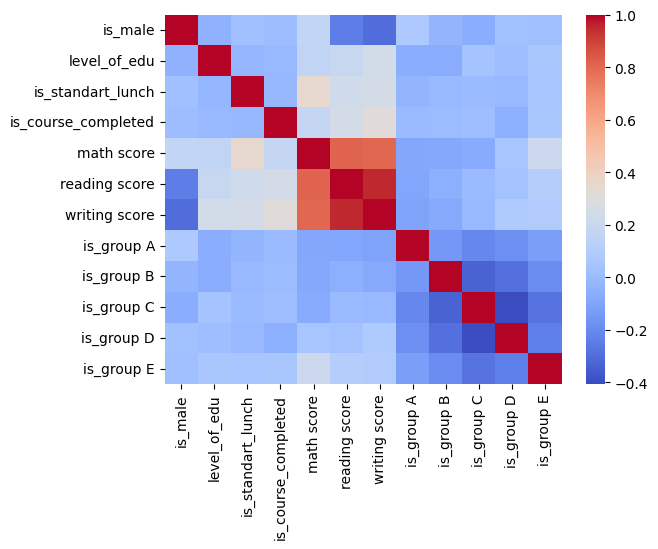

In [63]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [66]:
#is_male, writing,reading,math,groups

variable_table = df.drop(['level_of_edu','is_standart_lunch','is_course_completed'],axis=1)

In [67]:
variable_table

,is_male,math score,reading score,writing score,is_group A,is_group B,is_group C,is_group D,is_group E
0,0,72,72,74,0,1,0,0,0
1,0,69,90,88,0,0,1,0,0
2,0,90,95,93,0,1,0,0,0
3,1,47,57,44,1,0,0,0,0
4,1,76,78,75,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
995,0,88,99,95,0,0,0,0,1
996,1,62,55,55,0,0,1,0,0
997,0,59,71,65,0,0,1,0,0
998,0,68,78,77,0,0,0,1,0


In [70]:
y_math = variable_table["math score"]
y_writing = variable_table["writing score"]
y_reading = variable_table["reading score"]

In [78]:
from sklearn.preprocessing import StandardScaler

scaled_variable_table = pd.DataFrame(StandardScaler().fit_transform(variable_table))

In [80]:
scaled_variable_table.columns = variable_table.columns

In [82]:
X_math = scaled_variable_table.drop('math score',axis=1)
X_reading = scaled_variable_table.drop('reading score',axis=1)
X_writing = scaled_variable_table.drop('writing score',axis=1)

In [84]:
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [87]:
math_models= dict(
    lr_model = LinearRegression().fit(X_math,y_math),
    cb_model = CatBoostRegressor().fit(X_math,y_math),
    lgbm_model = LGBMRegressor().fit(X_math,y_math)
)
reading_models= dict(
    lr_model = LinearRegression().fit(X_reading,y_reading),
    cb_model = CatBoostRegressor().fit(X_reading,y_reading),
    lgbm_model = LGBMRegressor().fit(X_reading,y_reading)
)
writing_models= dict(
    lr_model = LinearRegression().fit(X_writing,y_writing),
    cb_model = CatBoostRegressor().fit(X_writing,y_writing),
    lgbm_model = LGBMRegressor().fit(X_writing,y_writing)
)

Learning rate set to 0.040943
0:	learn: 14.7443630	total: 52.3ms	remaining: 52.3s
1:	learn: 14.3267753	total: 53.6ms	remaining: 26.7s
2:	learn: 13.9215166	total: 54.8ms	remaining: 18.2s
3:	learn: 13.5441942	total: 55.9ms	remaining: 13.9s
4:	learn: 13.2000013	total: 56.8ms	remaining: 11.3s
5:	learn: 12.8639917	total: 57.8ms	remaining: 9.57s
6:	learn: 12.5262979	total: 58.7ms	remaining: 8.33s
7:	learn: 12.2049551	total: 59.8ms	remaining: 7.41s
8:	learn: 11.9031385	total: 60.6ms	remaining: 6.67s
9:	learn: 11.6232567	total: 61.7ms	remaining: 6.1s
10:	learn: 11.3316593	total: 63.3ms	remaining: 5.69s
11:	learn: 11.0756310	total: 64.7ms	remaining: 5.32s
12:	learn: 10.8251980	total: 66.3ms	remaining: 5.03s
13:	learn: 10.6508981	total: 67.2ms	remaining: 4.73s
14:	learn: 10.4200044	total: 68.1ms	remaining: 4.47s
15:	learn: 10.2321642	total: 68.6ms	remaining: 4.22s
16:	learn: 10.0111140	total: 69.3ms	remaining: 4.01s
17:	learn: 9.7971429	total: 70.1ms	remaining: 3.83s
18:	learn: 9.5913446	total: 

160:	learn: 5.5514480	total: 174ms	remaining: 905ms
161:	learn: 5.5500533	total: 175ms	remaining: 904ms
162:	learn: 5.5479283	total: 176ms	remaining: 901ms
163:	learn: 5.5466935	total: 176ms	remaining: 899ms
164:	learn: 5.5434330	total: 177ms	remaining: 897ms
165:	learn: 5.5412632	total: 178ms	remaining: 895ms
166:	learn: 5.5380389	total: 179ms	remaining: 893ms
167:	learn: 5.5376643	total: 179ms	remaining: 889ms
168:	learn: 5.5372330	total: 180ms	remaining: 885ms
169:	learn: 5.5334619	total: 181ms	remaining: 884ms
170:	learn: 5.5302177	total: 182ms	remaining: 881ms
171:	learn: 5.5300377	total: 182ms	remaining: 877ms
172:	learn: 5.5283962	total: 183ms	remaining: 875ms
173:	learn: 5.5262614	total: 184ms	remaining: 874ms
174:	learn: 5.5251787	total: 185ms	remaining: 871ms
175:	learn: 5.5223928	total: 186ms	remaining: 869ms
176:	learn: 5.5192230	total: 187ms	remaining: 867ms
177:	learn: 5.5156623	total: 187ms	remaining: 865ms
178:	learn: 5.5139606	total: 188ms	remaining: 864ms
179:	learn: 

344:	learn: 5.1481118	total: 341ms	remaining: 648ms
345:	learn: 5.1469262	total: 342ms	remaining: 647ms
346:	learn: 5.1462598	total: 343ms	remaining: 646ms
347:	learn: 5.1457223	total: 344ms	remaining: 645ms
348:	learn: 5.1418193	total: 346ms	remaining: 645ms
349:	learn: 5.1388457	total: 347ms	remaining: 644ms
350:	learn: 5.1371161	total: 348ms	remaining: 643ms
351:	learn: 5.1326688	total: 349ms	remaining: 642ms
352:	learn: 5.1308935	total: 350ms	remaining: 641ms
353:	learn: 5.1296504	total: 351ms	remaining: 640ms
354:	learn: 5.1286905	total: 352ms	remaining: 639ms
355:	learn: 5.1264366	total: 353ms	remaining: 638ms
356:	learn: 5.1251102	total: 354ms	remaining: 637ms
357:	learn: 5.1231012	total: 355ms	remaining: 636ms
358:	learn: 5.1188122	total: 356ms	remaining: 635ms
359:	learn: 5.1179167	total: 356ms	remaining: 634ms
360:	learn: 5.1173102	total: 357ms	remaining: 633ms
361:	learn: 5.1132793	total: 358ms	remaining: 632ms
362:	learn: 5.1127061	total: 359ms	remaining: 631ms
363:	learn: 

522:	learn: 4.8335765	total: 511ms	remaining: 466ms
523:	learn: 4.8318301	total: 513ms	remaining: 466ms
524:	learn: 4.8297888	total: 514ms	remaining: 465ms
525:	learn: 4.8265501	total: 515ms	remaining: 464ms
526:	learn: 4.8256533	total: 516ms	remaining: 463ms
527:	learn: 4.8253965	total: 517ms	remaining: 462ms
528:	learn: 4.8218963	total: 518ms	remaining: 461ms
529:	learn: 4.8209664	total: 519ms	remaining: 460ms
530:	learn: 4.8206973	total: 520ms	remaining: 460ms
531:	learn: 4.8197057	total: 521ms	remaining: 459ms
532:	learn: 4.8188741	total: 523ms	remaining: 458ms
533:	learn: 4.8182812	total: 523ms	remaining: 457ms
534:	learn: 4.8160680	total: 524ms	remaining: 456ms
535:	learn: 4.8151155	total: 525ms	remaining: 455ms
536:	learn: 4.8145703	total: 526ms	remaining: 454ms
537:	learn: 4.8118502	total: 527ms	remaining: 453ms
538:	learn: 4.8110750	total: 528ms	remaining: 452ms
539:	learn: 4.8101158	total: 529ms	remaining: 451ms
540:	learn: 4.8078482	total: 530ms	remaining: 450ms
541:	learn: 

733:	learn: 4.5525483	total: 684ms	remaining: 248ms
734:	learn: 4.5515298	total: 685ms	remaining: 247ms
735:	learn: 4.5490114	total: 686ms	remaining: 246ms
736:	learn: 4.5484687	total: 687ms	remaining: 245ms
737:	learn: 4.5479583	total: 688ms	remaining: 244ms
738:	learn: 4.5439264	total: 689ms	remaining: 243ms
739:	learn: 4.5430964	total: 690ms	remaining: 243ms
740:	learn: 4.5416223	total: 691ms	remaining: 242ms
741:	learn: 4.5408687	total: 692ms	remaining: 241ms
742:	learn: 4.5396318	total: 693ms	remaining: 240ms
743:	learn: 4.5389126	total: 694ms	remaining: 239ms
744:	learn: 4.5380634	total: 695ms	remaining: 238ms
745:	learn: 4.5356735	total: 696ms	remaining: 237ms
746:	learn: 4.5352627	total: 697ms	remaining: 236ms
747:	learn: 4.5345844	total: 698ms	remaining: 235ms
748:	learn: 4.5344044	total: 699ms	remaining: 234ms
749:	learn: 4.5331169	total: 700ms	remaining: 233ms
750:	learn: 4.5328951	total: 701ms	remaining: 232ms
751:	learn: 4.5319101	total: 702ms	remaining: 231ms
752:	learn: 

948:	learn: 4.3239758	total: 856ms	remaining: 46ms
949:	learn: 4.3205182	total: 857ms	remaining: 45.1ms
950:	learn: 4.3191122	total: 858ms	remaining: 44.2ms
951:	learn: 4.3184658	total: 859ms	remaining: 43.3ms
952:	learn: 4.3184126	total: 860ms	remaining: 42.4ms
953:	learn: 4.3166091	total: 861ms	remaining: 41.5ms
954:	learn: 4.3162496	total: 862ms	remaining: 40.6ms
955:	learn: 4.3160605	total: 863ms	remaining: 39.7ms
956:	learn: 4.3154099	total: 864ms	remaining: 38.8ms
957:	learn: 4.3142669	total: 865ms	remaining: 37.9ms
958:	learn: 4.3136566	total: 866ms	remaining: 37ms
959:	learn: 4.3127648	total: 867ms	remaining: 36.1ms
960:	learn: 4.3122458	total: 868ms	remaining: 35.2ms
961:	learn: 4.3115667	total: 868ms	remaining: 34.3ms
962:	learn: 4.3085172	total: 869ms	remaining: 33.4ms
963:	learn: 4.3079310	total: 870ms	remaining: 32.5ms
964:	learn: 4.3068549	total: 871ms	remaining: 31.6ms
965:	learn: 4.3047536	total: 872ms	remaining: 30.7ms
966:	learn: 4.3044939	total: 873ms	remaining: 29.8

166:	learn: 3.8847791	total: 170ms	remaining: 846ms
167:	learn: 3.8835206	total: 171ms	remaining: 848ms
168:	learn: 3.8817447	total: 172ms	remaining: 847ms
169:	learn: 3.8799721	total: 173ms	remaining: 846ms
170:	learn: 3.8787756	total: 174ms	remaining: 845ms
171:	learn: 3.8764683	total: 175ms	remaining: 844ms
172:	learn: 3.8746436	total: 176ms	remaining: 843ms
173:	learn: 3.8702232	total: 177ms	remaining: 842ms
174:	learn: 3.8685531	total: 178ms	remaining: 840ms
175:	learn: 3.8675394	total: 179ms	remaining: 839ms
176:	learn: 3.8649963	total: 180ms	remaining: 837ms
177:	learn: 3.8644851	total: 181ms	remaining: 834ms
178:	learn: 3.8627052	total: 181ms	remaining: 832ms
179:	learn: 3.8605719	total: 182ms	remaining: 830ms
180:	learn: 3.8596677	total: 183ms	remaining: 829ms
181:	learn: 3.8577778	total: 184ms	remaining: 826ms
182:	learn: 3.8560392	total: 185ms	remaining: 825ms
183:	learn: 3.8524602	total: 185ms	remaining: 823ms
184:	learn: 3.8488834	total: 186ms	remaining: 821ms
185:	learn: 

378:	learn: 3.5628513	total: 340ms	remaining: 557ms
379:	learn: 3.5608632	total: 341ms	remaining: 557ms
380:	learn: 3.5589465	total: 342ms	remaining: 556ms
381:	learn: 3.5572080	total: 343ms	remaining: 555ms
382:	learn: 3.5563973	total: 344ms	remaining: 555ms
383:	learn: 3.5536307	total: 345ms	remaining: 554ms
384:	learn: 3.5511942	total: 346ms	remaining: 553ms
385:	learn: 3.5496835	total: 347ms	remaining: 552ms
386:	learn: 3.5490597	total: 348ms	remaining: 551ms
387:	learn: 3.5473500	total: 349ms	remaining: 550ms
388:	learn: 3.5461439	total: 350ms	remaining: 549ms
389:	learn: 3.5459088	total: 350ms	remaining: 548ms
390:	learn: 3.5453635	total: 351ms	remaining: 547ms
391:	learn: 3.5449894	total: 352ms	remaining: 546ms
392:	learn: 3.5436514	total: 353ms	remaining: 546ms
393:	learn: 3.5427282	total: 354ms	remaining: 545ms
394:	learn: 3.5409786	total: 355ms	remaining: 544ms
395:	learn: 3.5395565	total: 356ms	remaining: 543ms
396:	learn: 3.5370340	total: 357ms	remaining: 542ms
397:	learn: 

597:	learn: 3.2950521	total: 511ms	remaining: 344ms
598:	learn: 3.2940777	total: 513ms	remaining: 344ms
599:	learn: 3.2929873	total: 514ms	remaining: 343ms
600:	learn: 3.2917384	total: 515ms	remaining: 342ms
601:	learn: 3.2912954	total: 516ms	remaining: 341ms
602:	learn: 3.2903551	total: 517ms	remaining: 340ms
603:	learn: 3.2891282	total: 518ms	remaining: 339ms
604:	learn: 3.2881979	total: 519ms	remaining: 339ms
605:	learn: 3.2877149	total: 519ms	remaining: 338ms
606:	learn: 3.2867847	total: 520ms	remaining: 337ms
607:	learn: 3.2857820	total: 521ms	remaining: 336ms
608:	learn: 3.2839123	total: 522ms	remaining: 335ms
609:	learn: 3.2828963	total: 523ms	remaining: 335ms
610:	learn: 3.2826831	total: 524ms	remaining: 334ms
611:	learn: 3.2815199	total: 525ms	remaining: 333ms
612:	learn: 3.2798230	total: 526ms	remaining: 332ms
613:	learn: 3.2795525	total: 527ms	remaining: 331ms
614:	learn: 3.2774758	total: 528ms	remaining: 330ms
615:	learn: 3.2769084	total: 529ms	remaining: 330ms
616:	learn: 

819:	learn: 3.1046276	total: 685ms	remaining: 150ms
820:	learn: 3.1039078	total: 686ms	remaining: 150ms
821:	learn: 3.1029786	total: 687ms	remaining: 149ms
822:	learn: 3.1023419	total: 688ms	remaining: 148ms
823:	learn: 3.1018654	total: 689ms	remaining: 147ms
824:	learn: 3.1010943	total: 690ms	remaining: 146ms
825:	learn: 3.0998672	total: 691ms	remaining: 146ms
826:	learn: 3.0997712	total: 692ms	remaining: 145ms
827:	learn: 3.0982786	total: 693ms	remaining: 144ms
828:	learn: 3.0979767	total: 694ms	remaining: 143ms
829:	learn: 3.0966549	total: 695ms	remaining: 142ms
830:	learn: 3.0953502	total: 696ms	remaining: 142ms
831:	learn: 3.0940430	total: 697ms	remaining: 141ms
832:	learn: 3.0934094	total: 698ms	remaining: 140ms
833:	learn: 3.0930576	total: 699ms	remaining: 139ms
834:	learn: 3.0915210	total: 699ms	remaining: 138ms
835:	learn: 3.0903446	total: 700ms	remaining: 137ms
836:	learn: 3.0895307	total: 701ms	remaining: 137ms
837:	learn: 3.0894630	total: 702ms	remaining: 136ms
838:	learn: 

Learning rate set to 0.040943
0:	learn: 14.7178963	total: 1.26ms	remaining: 1.26s
1:	learn: 14.2641789	total: 2.31ms	remaining: 1.15s
2:	learn: 13.8308403	total: 3.38ms	remaining: 1.12s
3:	learn: 13.3930910	total: 4.32ms	remaining: 1.08s
4:	learn: 13.0131863	total: 5.21ms	remaining: 1.04s
5:	learn: 12.6010935	total: 6.07ms	remaining: 1.01s
6:	learn: 12.2163097	total: 7.1ms	remaining: 1.01s
7:	learn: 11.8603380	total: 7.89ms	remaining: 979ms
8:	learn: 11.5116952	total: 8.79ms	remaining: 967ms
9:	learn: 11.1640953	total: 9.65ms	remaining: 955ms
10:	learn: 10.8328189	total: 10.6ms	remaining: 953ms
11:	learn: 10.5163365	total: 11.5ms	remaining: 948ms
12:	learn: 10.2279672	total: 12.4ms	remaining: 942ms
13:	learn: 9.9515630	total: 13.3ms	remaining: 939ms
14:	learn: 9.6881441	total: 14.4ms	remaining: 945ms
15:	learn: 9.4175765	total: 15.4ms	remaining: 950ms
16:	learn: 9.1615809	total: 16.4ms	remaining: 950ms
17:	learn: 8.9290429	total: 17.3ms	remaining: 945ms
18:	learn: 8.6945093	total: 18.3

188:	learn: 3.7255834	total: 170ms	remaining: 728ms
189:	learn: 3.7250251	total: 171ms	remaining: 728ms
190:	learn: 3.7247921	total: 171ms	remaining: 726ms
191:	learn: 3.7204865	total: 172ms	remaining: 724ms
192:	learn: 3.7191393	total: 173ms	remaining: 723ms
193:	learn: 3.7178980	total: 174ms	remaining: 723ms
194:	learn: 3.7168800	total: 175ms	remaining: 722ms
195:	learn: 3.7151158	total: 176ms	remaining: 720ms
196:	learn: 3.7143199	total: 176ms	remaining: 719ms
197:	learn: 3.7124515	total: 177ms	remaining: 718ms
198:	learn: 3.7116648	total: 178ms	remaining: 716ms
199:	learn: 3.7096897	total: 179ms	remaining: 715ms
200:	learn: 3.7093648	total: 179ms	remaining: 713ms
201:	learn: 3.7076317	total: 180ms	remaining: 712ms
202:	learn: 3.7062644	total: 181ms	remaining: 711ms
203:	learn: 3.7047110	total: 182ms	remaining: 710ms
204:	learn: 3.7033655	total: 183ms	remaining: 709ms
205:	learn: 3.7012695	total: 184ms	remaining: 708ms
206:	learn: 3.7011497	total: 184ms	remaining: 705ms
207:	learn: 

369:	learn: 3.4721642	total: 339ms	remaining: 577ms
370:	learn: 3.4693039	total: 341ms	remaining: 578ms
371:	learn: 3.4668910	total: 342ms	remaining: 577ms
372:	learn: 3.4658521	total: 343ms	remaining: 576ms
373:	learn: 3.4648849	total: 344ms	remaining: 575ms
374:	learn: 3.4640346	total: 345ms	remaining: 575ms
375:	learn: 3.4615491	total: 346ms	remaining: 574ms
376:	learn: 3.4588021	total: 347ms	remaining: 573ms
377:	learn: 3.4585530	total: 348ms	remaining: 573ms
378:	learn: 3.4550059	total: 349ms	remaining: 572ms
379:	learn: 3.4518460	total: 350ms	remaining: 572ms
380:	learn: 3.4491630	total: 351ms	remaining: 571ms
381:	learn: 3.4467638	total: 352ms	remaining: 570ms
382:	learn: 3.4442338	total: 353ms	remaining: 569ms
383:	learn: 3.4423241	total: 354ms	remaining: 569ms
384:	learn: 3.4406893	total: 355ms	remaining: 568ms
385:	learn: 3.4386671	total: 356ms	remaining: 567ms
386:	learn: 3.4367761	total: 357ms	remaining: 566ms
387:	learn: 3.4342308	total: 358ms	remaining: 565ms
388:	learn: 

579:	learn: 3.1935766	total: 509ms	remaining: 368ms
580:	learn: 3.1919953	total: 510ms	remaining: 368ms
581:	learn: 3.1919316	total: 511ms	remaining: 367ms
582:	learn: 3.1907318	total: 512ms	remaining: 366ms
583:	learn: 3.1905675	total: 513ms	remaining: 365ms
584:	learn: 3.1892530	total: 513ms	remaining: 364ms
585:	learn: 3.1879662	total: 514ms	remaining: 363ms
586:	learn: 3.1879037	total: 515ms	remaining: 362ms
587:	learn: 3.1866706	total: 516ms	remaining: 362ms
588:	learn: 3.1865419	total: 517ms	remaining: 361ms
589:	learn: 3.1864018	total: 518ms	remaining: 360ms
590:	learn: 3.1863116	total: 519ms	remaining: 359ms
591:	learn: 3.1847461	total: 520ms	remaining: 358ms
592:	learn: 3.1820280	total: 520ms	remaining: 357ms
593:	learn: 3.1809109	total: 522ms	remaining: 356ms
594:	learn: 3.1808320	total: 522ms	remaining: 356ms
595:	learn: 3.1794122	total: 523ms	remaining: 355ms
596:	learn: 3.1777604	total: 524ms	remaining: 354ms
597:	learn: 3.1760295	total: 525ms	remaining: 353ms
598:	learn: 

799:	learn: 2.9870063	total: 681ms	remaining: 170ms
800:	learn: 2.9862647	total: 682ms	remaining: 169ms
801:	learn: 2.9842310	total: 683ms	remaining: 169ms
802:	learn: 2.9825436	total: 684ms	remaining: 168ms
803:	learn: 2.9809362	total: 685ms	remaining: 167ms
804:	learn: 2.9809078	total: 685ms	remaining: 166ms
805:	learn: 2.9799129	total: 686ms	remaining: 165ms
806:	learn: 2.9791388	total: 687ms	remaining: 164ms
807:	learn: 2.9785706	total: 688ms	remaining: 163ms
808:	learn: 2.9778976	total: 689ms	remaining: 163ms
809:	learn: 2.9773132	total: 690ms	remaining: 162ms
810:	learn: 2.9768807	total: 690ms	remaining: 161ms
811:	learn: 2.9764505	total: 691ms	remaining: 160ms
812:	learn: 2.9759623	total: 692ms	remaining: 159ms
813:	learn: 2.9753275	total: 693ms	remaining: 158ms
814:	learn: 2.9743230	total: 694ms	remaining: 158ms
815:	learn: 2.9733414	total: 695ms	remaining: 157ms
816:	learn: 2.9733250	total: 696ms	remaining: 156ms
817:	learn: 2.9713498	total: 696ms	remaining: 155ms
818:	learn: 

In [88]:
for k,v in math_models.items():
    print("{} has score=> {}".format(k,v.score(X_math,y_math)))

lr_model has score=> 0.8520847546684499
cb_model has score=> 0.920542266780693
lgbm_model has score=> 0.9075774959440549


In [89]:
for k,v in reading_models.items():
    print("{} has score=> {}".format(k,v.score(X_reading,y_reading)))

lr_model has score=> 0.9208870243730518
cb_model has score=> 0.958657092753365
lgbm_model has score=> 0.9524916587752488


In [90]:
for k,v in writing_models.items():
    print("{} has score=> {}".format(k,v.score(X_writing,y_writing)))

lr_model has score=> 0.9320713937442182
cb_model has score=> 0.9654734983587213
lgbm_model has score=> 0.9599599430281246
